# Chicago Community Areas GeoJSON

## Installations

In [2]:
# !pip3 install --upgrade pip

In [42]:
# %pip install geopandas
# %pip install tabulate
# pip install contextily

## Imports

In [1]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
%matplotlib inline

import contextily as cx

## Display Imports & Their Versions

In [2]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['GeoPandas', geopandas.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| GeoPandas          | 1.0.1     |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


## Import Dataset

In [3]:
gdf = geopandas.read_file("chicago-community-areas.geojson")

gdf

community area     shape_area perimeter area_num_1 area_numbe  \
0           DOUGLAS    0  46004621.1581         0         35         35   
1           OAKLAND    0  16913961.0408         0         36         36   
2       FULLER PARK    0  19916704.8692         0         37         37   
3   GRAND BOULEVARD    0  48492503.1554         0         38         38   
4           KENWOOD    0  29071741.9283         0         39         39   
..              ...  ...            ...       ...        ...        ...   
72  MOUNT GREENWOOD    0  75584290.0209         0         74         74   
73      MORGAN PARK    0  91877340.6988         0         75         75   
74            OHARE    0  371835607.687         0         76         76   
75        EDGEWATER    0  48449990.8397         0         77         77   
76      EDISON PARK    0  31636313.7864         0          9          9   

   comarea_id comarea      shape_len  \
0           0       0  31027.0545098   
1           0       0  19565.5061533   
2           0       0  25339.0897503   
3           0       0  28196.8371573   
4           0       0  23325.1679062   
..        ...     ...            ...   
72          0       0  48665.1305392   
73          0       0   46396.419362   
74          0       0   173625.98466   
75          0       0  31004.8309456   
76          0       0   25937.226841   

                                             geometry  
0   MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1   MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  
2   MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...  
3   MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...  
4   MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...  
..                                                ...  
72  MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...  
73  MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...  
74  MULTIPOLYGON (((-87.83658 41.9864, -87.83658 4...  
75  MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...  
76  MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...  

[77 rows x 10 columns]

In [4]:
gdf.describe(include='all')

community area     shape_area perimeter area_num_1 area_numbe  \
count         77   77             77        77         77         77   
unique        77    1             77         1         77         77   
top      DOUGLAS    0  46004621.1581         0         35         35   
freq           1   77              1        77          1          1   

       comarea_id comarea      shape_len  \
count          77      77             77   
unique          1       1             77   
top             0       0  31027.0545098   
freq           77      77              1   

                                                 geometry  
count                                                  77  
unique                                                 77  
top     MULTIPOLYGON (((-87.60914087617894 41.84469250...  
freq                                                    1

### Return Information About Unqiue Values in Select Features

In [5]:
cols_to_check = [
    "community",
    "area",
    "shape_area",
    "perimeter",
    "area_num_1",
    "area_numbe",
    "comarea_id",
    "comarea",
    "shape_len"
]

cutoff_to_show = round(len(gdf) / 2, 0)

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < 80:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

community (77)
['ALBANY PARK' 'ARCHER HEIGHTS' 'ARMOUR SQUARE' 'ASHBURN' 'AUBURN GRESHAM'
 'AUSTIN' 'AVALON PARK' 'AVONDALE' 'BELMONT CRAGIN' 'BEVERLY' 'BRIDGEPORT'
 'BRIGHTON PARK' 'BURNSIDE' 'CALUMET HEIGHTS' 'CHATHAM' 'CHICAGO LAWN'
 'CLEARING' 'DOUGLAS' 'DUNNING' 'EAST GARFIELD PARK' 'EAST SIDE'
 'EDGEWATER' 'EDISON PARK' 'ENGLEWOOD' 'FOREST GLEN' 'FULLER PARK'
 'GAGE PARK' 'GARFIELD RIDGE' 'GRAND BOULEVARD' 'GREATER GRAND CROSSING'
 'HEGEWISCH' 'HERMOSA' 'HUMBOLDT PARK' 'HYDE PARK' 'IRVING PARK'
 'JEFFERSON PARK' 'KENWOOD' 'LAKE VIEW' 'LINCOLN PARK' 'LINCOLN SQUARE'
 'LOGAN SQUARE' 'LOOP' 'LOWER WEST SIDE' 'MCKINLEY PARK' 'MONTCLARE'
 'MORGAN PARK' 'MOUNT GREENWOOD' 'NEAR NORTH SIDE' 'NEAR SOUTH SIDE'
 'NEAR WEST SIDE' 'NEW CITY' 'NORTH CENTER' 'NORTH LAWNDALE' 'NORTH PARK'
 'NORWOOD PARK' 'OAKLAND' 'OHARE' 'PORTAGE PARK' 'PULLMAN' 'RIVERDALE'
 'ROGERS PARK' 'ROSELAND' 'SOUTH CHICAGO' 'SOUTH DEERING' 'SOUTH LAWNDALE'
 'SOUTH SHORE' 'UPTOWN' 'WASHINGTON HEIGHTS' 'WASHINGTON PARK'
 

### Remove Select Features 

In [6]:
cols_to_remove = [
    "area",
    "perimeter",
    "area_numbe",
    "comarea_id",
    "comarea",
]

gdf.drop(columns=cols_to_remove, inplace=True)

gdf

community     shape_area area_num_1      shape_len  \
0           DOUGLAS  46004621.1581         35  31027.0545098   
1           OAKLAND  16913961.0408         36  19565.5061533   
2       FULLER PARK  19916704.8692         37  25339.0897503   
3   GRAND BOULEVARD  48492503.1554         38  28196.8371573   
4           KENWOOD  29071741.9283         39  23325.1679062   
..              ...            ...        ...            ...   
72  MOUNT GREENWOOD  75584290.0209         74  48665.1305392   
73      MORGAN PARK  91877340.6988         75   46396.419362   
74            OHARE  371835607.687         76   173625.98466   
75        EDGEWATER  48449990.8397         77  31004.8309456   
76      EDISON PARK  31636313.7864          9   25937.226841   

                                             geometry  
0   MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1   MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  
2   MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...  
3   MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...  
4   MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...  
..                                                ...  
72  MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...  
73  MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...  
74  MULTIPOLYGON (((-87.83658 41.9864, -87.83658 4...  
75  MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...  
76  MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...  

[77 rows x 5 columns]

### Rename Features as Needed

In [7]:
cols_to_rename = {
    "shape_area": "shape_area",
    "area_num_1": "area_number"
    }

gdf.rename(columns=cols_to_rename, inplace=True)

gdf.head()

community     shape_area area_number      shape_len  \
0          DOUGLAS  46004621.1581          35  31027.0545098   
1          OAKLAND  16913961.0408          36  19565.5061533   
2      FULLER PARK  19916704.8692          37  25339.0897503   
3  GRAND BOULEVARD  48492503.1554          38  28196.8371573   
4          KENWOOD  29071741.9283          39  23325.1679062   

                                            geometry  
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  
2  MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...  
3  MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...  
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...

## Data Visualizations

### Non-Interactive Data Visualization

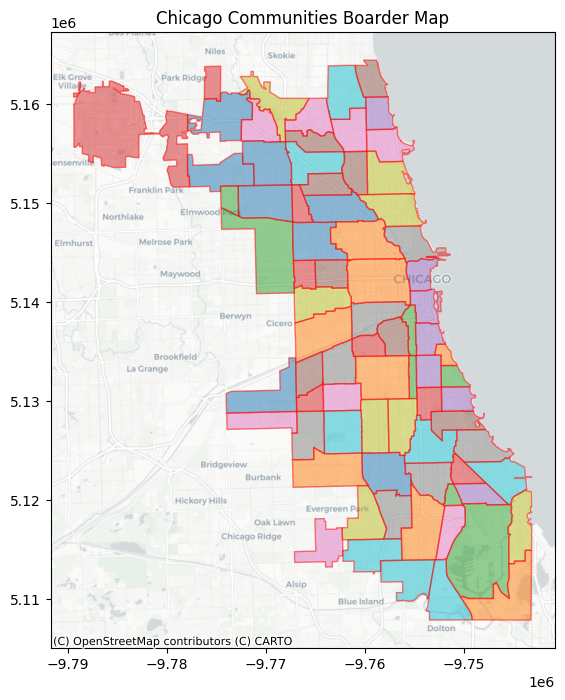

In [8]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(24, 8))
gdf_plot.plot(column='shape_area', ax=ax, alpha=0.5, edgecolor="red")

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Chicago Communities Boarder Map")

plt.show()

### Interactive Data Visualization

In [10]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   community    77 non-null     object  
 1   shape_area   77 non-null     object  
 2   area_number  77 non-null     object  
 3   shape_len    77 non-null     object  
 4   geometry     77 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 3.1+ KB


In [11]:
gdf.explore(
    m = folium.Map(
        location=[41.881832, -87.623177], 
        tiles='OpenStreetMap', # CartoDB Voyager, OpenStreetMap
        zoom_start=10,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': 'black',
        'weight': 1,
        'opacity': 0.85,
        'fill': True,
        'fillColor': 'grey',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'red',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#FF474C',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': ['Community', 'Area of Shape', "Area Number", 'Shape Length']
    }
)

## Methods & Attributes

### Append Geometry Type Feature to GeoDataFrame

In [14]:
print("Geometry Type")

gdf_gt = gdf[['community', 'shape_area', 'area_number', 'shape_len', 'geometry']].copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


community     shape_area area_number      shape_len  \
0           DOUGLAS  46004621.1581          35  31027.0545098   
1           OAKLAND  16913961.0408          36  19565.5061533   
2       FULLER PARK  19916704.8692          37  25339.0897503   
3   GRAND BOULEVARD  48492503.1554          38  28196.8371573   
4           KENWOOD  29071741.9283          39  23325.1679062   
..              ...            ...         ...            ...   
72  MOUNT GREENWOOD  75584290.0209          74  48665.1305392   
73      MORGAN PARK  91877340.6988          75   46396.419362   
74            OHARE  371835607.687          76   173625.98466   
75        EDGEWATER  48449990.8397          77  31004.8309456   
76      EDISON PARK  31636313.7864           9   25937.226841   

                                             geometry geometry_type  
0   MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  MultiPolygon  
1   MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  MultiPolygon  
2   MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...  MultiPolygon  
3   MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...  MultiPolygon  
4   MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...  MultiPolygon  
..                                                ...           ...  
72  MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...  MultiPolygon  
73  MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...  MultiPolygon  
74  MULTIPOLYGON (((-87.83658 41.9864, -87.83658 4...  MultiPolygon  
75  MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...  MultiPolygon  
76  MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...  MultiPolygon  

[77 rows x 6 columns]

### Retrieve Data About Each Polygon

In [16]:
gdf_for_area = gdf.to_crs(3857)
print("gdf_for_area.area:\n", gdf_for_area.area)
print("gdf.boundary:\n", gdf.boundary)
print("gdf.bounds:\n", gdf.bounds)
print("gdf.total_bounds:\n", gdf.total_bounds)

gdf_for_area.area:
 0     7.704645e+06
1     2.831664e+06
2     3.332879e+06
3     8.115722e+06
4     4.864822e+06
          ...     
72    1.260398e+07
73    1.531832e+07
74    6.254948e+07
75    8.152617e+06
76    5.327034e+06
Length: 77, dtype: float64
gdf.boundary:
 0     MULTILINESTRING ((-87.60914 41.84469, -87.6091...
1     MULTILINESTRING ((-87.59215 41.81693, -87.5923...
2     MULTILINESTRING ((-87.6288 41.80189, -87.62879...
3     MULTILINESTRING ((-87.60671 41.81681, -87.6067...
4     MULTILINESTRING ((-87.59215 41.81693, -87.5921...
                            ...                        
72    MULTILINESTRING ((-87.69646 41.70714, -87.6964...
73    MULTILINESTRING ((-87.64215 41.68508, -87.6424...
74    MULTILINESTRING ((-87.83658 41.9864, -87.83658...
75    MULTILINESTRING ((-87.65456 41.99817, -87.6545...
76    MULTILINESTRING ((-87.80676 42.00084, -87.8067...
Length: 77, dtype: geometry
gdf.bounds:
          minx       miny       maxx       maxy
0  -87.629965  41.823681 

### Add Distance Features to Dataset

In [17]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [18]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

community     shape_area area_number      shape_len  \
0           DOUGLAS  46004621.1581          35  31027.0545098   
1           OAKLAND  16913961.0408          36  19565.5061533   
2       FULLER PARK  19916704.8692          37  25339.0897503   
3   GRAND BOULEVARD  48492503.1554          38  28196.8371573   
4           KENWOOD  29071741.9283          39  23325.1679062   
..              ...            ...         ...            ...   
72  MOUNT GREENWOOD  75584290.0209          74  48665.1305392   
73      MORGAN PARK  91877340.6988          75   46396.419362   
74            OHARE  371835607.687          76   173625.98466   
75        EDGEWATER  48449990.8397          77  31004.8309456   
76      EDISON PARK  31636313.7864           9   25937.226841   

                                             geometry  dist_from_harvard  \
0   MULTIPOLYGON (((449429.813 4632712.182, 449429...       1.371349e+06   
1   MULTIPOLYGON (((450818.899 4629619.879, 450806...       1.370715e+06   
2   MULTIPOLYGON (((447763.097 4627972.082, 447763...       1.373676e+06   
3   MULTIPOLYGON (((449609.917 4629615.48, 449610....       1.371797e+06   
4   MULTIPOLYGON (((450818.899 4629619.879, 450819...       1.369935e+06   
..                                                ...                ...   
72  MULTIPOLYGON (((442056.996 4617496.001, 442058...       1.381089e+06   
73  MULTIPOLYGON (((446556.956 4615011.389, 446528...       1.376787e+06   
74  MULTIPOLYGON (((430701.343 4648604.251, 430701...       1.388251e+06   
75  MULTIPOLYGON (((445789.555 4649779.811, 445789...       1.372827e+06   
76  MULTIPOLYGON (((433186.818 4650183.961, 433186...       1.385320e+06   

    frechet_dist_from_harvard  hausdorff_dist_from_harvard  
0                1.373644e+06                 1.373644e+06  
1                1.372297e+06                 1.372297e+06  
2                1.374641e+06                 1.374641e+06  
3                1.373975e+06                 1.373975e+06  
4                1.372128e+06                 1.372128e+06  
..                        ...                          ...  
72               1.385022e+06                 1.385022e+06  
73               1.381406e+06                 1.381406e+06  
74               1.397044e+06                 1.397044e+06  
75               1.375078e+06                 1.375078e+06  
76               1.386855e+06                 1.386855e+06  

[77 rows x 8 columns]

### Retrieve Coordinates

In [19]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
            x          y   z
0  -87.609141  41.844693 NaN
0  -87.609149  41.844662 NaN
0  -87.609161  41.844590 NaN
0  -87.609168  41.844517 NaN
0  -87.609169  41.844456 NaN
..        ...        ...  ..
76 -87.806755  42.001139 NaN
76 -87.806755  42.001139 NaN
76 -87.806755  42.001139 NaN
76 -87.806758  42.000853 NaN
76 -87.806759  42.000837 NaN

[52641 rows x 3 columns]

GDF Count Coordinates:
0      352
1      314
2      317
3      328
4      693
      ... 
72     735
73     617
74    2424
75     749
76     549
Length: 77, dtype: int32

GDF Count Geometries:
0     1
1     1
2     1
3     1
4     1
     ..
72    1
73    1
74    3
75    1
76    1
Length: 77, dtype: int32


### Some Basic Functions

In [21]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True    77
dtype: int64

is_valid:
True    77
dtype: int64

is_valid_reason:
Valid Geometry    77
dtype: int64

has_z:
False    77
dtype: int64



### Determine if Certain Points Are Within Mapped Polygons

In [22]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
Empty GeoDataFrame
Columns: [geometry, index_right, community, shape_area, area_number, shape_len]
Index: []


### Return Points Not Within Mapped Polygons

In [23]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
                     geometry
0  POINT (-95.67804 39.04833)
1   POINT (-114.0719 51.0447)
2              POINT (80 -10)
3    POINT (-19.0208 64.9631)
4     POINT (31.1342 29.9792)
5      POINT (86.925 27.9881)
6     POINT (149.13 -35.2809)


In [43]:
latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)
ref_point_gs = geopandas.GeoSeries([ref_point], crs=gdf_projected.crs)

# List of distances to check
distances = [5, 10, 50, 100, 250, 500]

# Initialize a DataFrame to store results
results = gdf_projected.copy()

# Apply the dwithin function for each distance
for dist in distances:
    results[f'within_{dist}'] = gdf_projected.geometry.dwithin(ref_point_gs.geometry[0], distance=dist)

# Display the results
print(results)

          community     shape_area area_number      shape_len  \
0           DOUGLAS  46004621.1581          35  31027.0545098   
1           OAKLAND  16913961.0408          36  19565.5061533   
2       FULLER PARK  19916704.8692          37  25339.0897503   
3   GRAND BOULEVARD  48492503.1554          38  28196.8371573   
4           KENWOOD  29071741.9283          39  23325.1679062   
..              ...            ...         ...            ...   
72  MOUNT GREENWOOD  75584290.0209          74  48665.1305392   
73      MORGAN PARK  91877340.6988          75   46396.419362   
74            OHARE  371835607.687          76   173625.98466   
75        EDGEWATER  48449990.8397          77  31004.8309456   
76      EDISON PARK  31636313.7864           9   25937.226841   

                                             geometry  dist_from_harvard  \
0   MULTIPOLYGON (((449429.813 4632712.182, 449429...       1.371349e+06   
1   MULTIPOLYGON (((450818.899 4629619.879, 450806...       1.37071

### Some More Functions

In [26]:
gdf.boundary

0     MULTILINESTRING ((-87.60914 41.84469, -87.6091...
1     MULTILINESTRING ((-87.59215 41.81693, -87.5923...
2     MULTILINESTRING ((-87.6288 41.80189, -87.62879...
3     MULTILINESTRING ((-87.60671 41.81681, -87.6067...
4     MULTILINESTRING ((-87.59215 41.81693, -87.5921...
                            ...                        
72    MULTILINESTRING ((-87.69646 41.70714, -87.6964...
73    MULTILINESTRING ((-87.64215 41.68508, -87.6424...
74    MULTILINESTRING ((-87.83658 41.9864, -87.83658...
75    MULTILINESTRING ((-87.65456 41.99817, -87.6545...
76    MULTILINESTRING ((-87.80676 42.00084, -87.8067...
Length: 77, dtype: geometry

In [27]:
gdf_projected.buffer(distance=125)

0     POLYGON ((447645.445 4631103.235, 447645.104 4...
1     POLYGON ((449141.551 4631084.142, 449172.728 4...
2     POLYGON ((447049.428 4630207.566, 447049.235 4...
3     POLYGON ((447629.992 4629107.003, 447629.989 4...
4     POLYGON ((450500.24 4629738.435, 450535.886 46...
                            ...                        
72    POLYGON ((439889.613 4617771.854, 439889.613 4...
73    POLYGON ((441972.785 4615373.462, 441972.64 46...
74    POLYGON ((422024.035 4647902.337, 422024.035 4...
75    POLYGON ((443989.941 4648916.297, 443986.359 4...
76    POLYGON ((431849.406 4650090.84, 431849.41 465...
Length: 77, dtype: geometry

In [28]:
gdf_projected.centroid

0     POINT (448630.409 4631654.816)
1      POINT (449905.354 4630383.56)
2      POINT (447467.72 4628772.723)
3     POINT (448680.636 4629192.983)
4     POINT (450477.971 4628732.537)
                   ...              
72    POINT (440653.589 4616145.578)
73    POINT (444321.998 4615544.441)
74    POINT (425957.828 4647462.703)
75    POINT (445045.869 4648513.688)
76     POINT (432612.383 4650941.72)
Length: 77, dtype: geometry

In [29]:
gdf.convex_hull

0     POLYGON ((-87.62897 41.82368, -87.62956 41.830...
1     POLYGON ((-87.60671 41.81681, -87.61262 41.823...
2     POLYGON ((-87.63546 41.79448, -87.63638 41.810...
3     POLYGON ((-87.6288 41.80189, -87.62891 41.8032...
4     POLYGON ((-87.60641 41.80225, -87.60642 41.802...
                            ...                        
72    POLYGON ((-87.71136 41.68044, -87.73945 41.683...
73    POLYGON ((-87.66732 41.67596, -87.68621 41.677...
74    POLYGON ((-87.84962 41.93729, -87.91228 41.951...
75    POLYGON ((-87.67441 41.9761, -87.67441 41.9762...
76    POLYGON ((-87.80682 41.99539, -87.80724 41.995...
Length: 77, dtype: geometry

In [30]:
gdf.envelope

0     POLYGON ((-87.62997 41.82368, -87.6027 41.8236...
1     POLYGON ((-87.61262 41.81681, -87.59215 41.816...
2     POLYGON ((-87.63638 41.79448, -87.62856 41.794...
3     POLYGON ((-87.62936 41.80189, -87.60641 41.801...
4     POLYGON ((-87.60671 41.80225, -87.58001 41.802...
                            ...                        
72    POLYGON ((-87.73974 41.68044, -87.69576 41.680...
73    POLYGON ((-87.69592 41.67596, -87.64215 41.675...
74    POLYGON ((-87.94011 41.93729, -87.83479 41.937...
75    POLYGON ((-87.67501 41.9761, -87.64729 41.9761...
76    POLYGON ((-87.82141 41.99539, -87.80655 41.995...
Length: 77, dtype: geometry

In [31]:
gdf.extract_unique_points()

0     MULTIPOINT (-87.60914 41.84469, -87.60915 41.8...
1     MULTIPOINT (-87.59215 41.81693, -87.59231 41.8...
2     MULTIPOINT (-87.6288 41.80189, -87.62879 41.80...
3     MULTIPOINT (-87.60671 41.81681, -87.6067 41.81...
4     MULTIPOINT (-87.59215 41.81693, -87.59215 41.8...
                            ...                        
72    MULTIPOINT (-87.69646 41.70714, -87.69644 41.7...
73    MULTIPOINT (-87.64215 41.68508, -87.64249 41.6...
74    MULTIPOINT (-87.83658 41.9864, -87.83658 41.98...
75    MULTIPOINT (-87.65456 41.99817, -87.65456 41.9...
76    MULTIPOINT (-87.80676 42.00084, -87.80676 42.0...
Length: 77, dtype: geometry

In [32]:
gdf.force_2d()

0     MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...
1     MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...
2     MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...
3     MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...
4     MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...
                            ...                        
72    MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...
73    MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...
74    MULTIPOLYGON (((-87.83658 41.9864, -87.83658 4...
75    MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...
76    MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...
Length: 77, dtype: geometry

In [33]:
gdf.minimum_bounding_circle()

0     POLYGON ((-87.60225 41.83513, -87.60256 41.832...
1     POLYGON ((-87.58972 41.82406, -87.58995 41.821...
2     POLYGON ((-87.61736 41.80909, -87.61765 41.806...
3     POLYGON ((-87.60218 41.81296, -87.60249 41.809...
4     POLYGON ((-87.57856 41.80967, -87.57885 41.806...
                            ...                        
72    POLYGON ((-87.69345 41.69539, -87.69393 41.690...
73    POLYGON ((-87.64139 41.69153, -87.64192 41.686...
74    POLYGON ((-87.82501 41.97087, -87.82619 41.958...
75    POLYGON ((-87.64431 41.98741, -87.64464 41.984...
76    POLYGON ((-87.79995 42.00726, -87.80021 42.004...
Length: 77, dtype: geometry

In [34]:
gdf.minimum_clearance()

0     4.665199e-09
1     3.857610e-09
2     1.015857e-08
3     3.857610e-09
4     1.957505e-09
          ...     
72    2.195456e-09
73    3.294711e-09
74    1.686026e-09
75    4.455299e-09
76    1.646490e-09
Length: 77, dtype: float64

In [35]:
gdf.minimum_rotated_rectangle()

0     POLYGON ((-87.62964 41.82364, -87.60258 41.824...
1     POLYGON ((-87.59082 41.81805, -87.60544 41.835...
2     POLYGON ((-87.6367 41.82357, -87.63597 41.7944...
3     POLYGON ((-87.60645 41.82404, -87.62937 41.823...
4     POLYGON ((-87.58011 41.81705, -87.60671 41.816...
                            ...                        
72    POLYGON ((-87.69315 41.71109, -87.73688 41.716...
73    POLYGON ((-87.69568 41.67555, -87.64203 41.676...
74    POLYGON ((-87.82291 41.99029, -87.93669 42.015...
75    POLYGON ((-87.64761 41.99843, -87.67501 41.998...
76    POLYGON ((-87.80678 41.99539, -87.80655 42.018...
Length: 77, dtype: geometry

In [36]:
gdf.normalize()

0     MULTIPOLYGON (((-87.62997 41.84554, -87.62997 ...
1     MULTIPOLYGON (((-87.61262 41.82389, -87.61258 ...
2     MULTIPOLYGON (((-87.63638 41.81091, -87.6363 4...
3     MULTIPOLYGON (((-87.62936 41.82327, -87.62935 ...
4     MULTIPOLYGON (((-87.60671 41.81681, -87.60634 ...
                            ...                        
72    MULTIPOLYGON (((-87.73974 41.69086, -87.73974 ...
73    MULTIPOLYGON (((-87.69592 41.69162, -87.6959 4...
74    MULTIPOLYGON (((-87.93993 41.99349, -87.93989 ...
75    MULTIPOLYGON (((-87.67501 41.99799, -87.67486 ...
76    MULTIPOLYGON (((-87.82141 41.99685, -87.82141 ...
Length: 77, dtype: geometry

### Visualize Translated (Shifted) Map

In [38]:
translated_gdf = gdf.translate(xoff=0, yoff=-2.5)

translated_gdf.explore()

### Iterate Through All Rows

In [ ]:
for index, row in gdf.iterrows():
    print("All Data:", row)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

### Iterate Through All Features

In [ ]:
for feature in gdf.iterfeatures():
    print(feature)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

### Interface

In [ ]:
gdf.__geo_interface__

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

## Save Cleaned Dataset to File

In [42]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/